In [1]:
import magma as m
from mantle import DefineRegister

To implement a counter we can use the `DefineRegister` primitive and the `+` operator for `m.UInt` instances.

In [2]:
Reg4 = DefineRegister(4, _type=m.UInt)

class Counter4(m.Circuit):
    name = "Counter4"
    IO = ["count", m.Out(m.UInt(4))] + m.ClockInterface()
    @classmethod
    def definition(io):
        reg4 = Reg4()
        count = reg4.O + m.uint(1,4)
        m.wire(count, reg4.I)
        m.wire(reg4.O, io.count)
        m.wireclock(io, reg4)

We use the Python simulator to generate a waveform of our circuit.
* `step` steps the clock
* `evaluate` evaluates the circuit
* `get_value` returns the value of the circuit ports

In [3]:
from magma.simulator.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(Counter4, Counter4.CLK)
scope = Scope()
waveforms = []
for i in range(18):
    for j in range(2):
        simulator.advance()
        simulator.evaluate()
        clk = simulator.get_value(Counter4.CLK, scope)
        O = simulator.get_value(Counter4.count, scope)
        waveforms.append(O + [clk])

magma provides a helper function to plot waveform diagrams

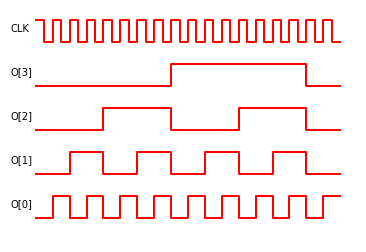

In [4]:
from magma.waveform import waveform

waveform(waveforms, ["O[0]", "O[1]", "O[2]", "O[3]", "CLK"])

We can also inspect the generated verilog for our counter.

In [5]:
m.compile("build/counter", Counter4, include_coreir=True)

compiling DFF_init0_has_ceFalse_has_resetFalse
compiling Register4
compiling Add4
compiling Counter4


In [6]:
with open("build/counter.v", "r") as counter_verilog:
    print(counter_verilog.read())

`include "/Users/lenny/google_drive/repos/magmathon/magma/magma/backend/coreir_prims.v"
module DFF_init0_has_ceFalse_has_resetFalse (input  I, output  O, input  CLK);
wire [0:0] inst0_out;
coreir_reg_P #(.init(<coreir.type.BitVector object at 0x1061f8240>)) inst0 (.in({I}), .clk(CLK), .out(inst0_out));
assign O = inst0_out[0];
endmodule

module Register4 (input [3:0] I, output [3:0] O, input  CLK);
wire  inst0_O;
wire  inst1_O;
wire  inst2_O;
wire  inst3_O;
DFF_init0_has_ceFalse_has_resetFalse inst0 (.I(I[0]), .O(inst0_O), .CLK(CLK));
DFF_init0_has_ceFalse_has_resetFalse inst1 (.I(I[1]), .O(inst1_O), .CLK(CLK));
DFF_init0_has_ceFalse_has_resetFalse inst2 (.I(I[2]), .O(inst2_O), .CLK(CLK));
DFF_init0_has_ceFalse_has_resetFalse inst3 (.I(I[3]), .O(inst3_O), .CLK(CLK));
assign O = {inst3_O,inst2_O,inst1_O,inst0_O};
endmodule

module Add4 (input [3:0] I0, input [3:0] I1, output [3:0] O);
wire [3:0] inst0_out;
coreir_add4 inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
en